In [2]:
!rm Data/*
from importlib.resources import path
import numpy as np
import matplotlib.pyplot as plt
import os.path as path
import wget

rm: cannot remove 'Data/*': No such file or directory


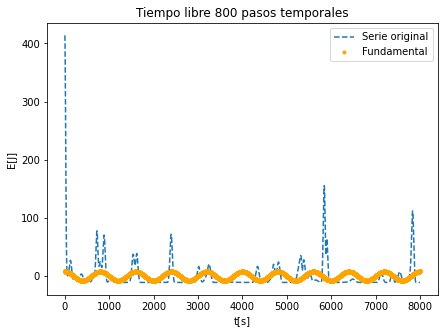

In [4]:
#2 Tiempo libre medio

file = "EnergiaPotencialGas2D.txt"
data = np.loadtxt(file)

t= data[:,0]
E= data[:,1]

Vmedio = E- np.mean(E)
N=len(Vmedio)

fft=np.fft.fft(Vmedio)
freq=np.fft.fftfreq(N,1)
XMag_=np.abs(fft)

mask= freq<0
XMag_[mask] = 0

XMag2_=np.argmax(XMag_)
f_fundamental= freq[XMag2_]
tau=1/f_fundamental

izquierda=np.abs(freq) > f_fundamental
derecha=np.abs(freq) < f_fundamental

fft[izquierda]=0
fft[derecha]=0

DFFT = np.fft.ifft(fft)

fig = plt.figure(figsize=(7,5))
plt.title("Tiempo libre 800 pasos temporales")
plt.plot(t*1000,Vmedio,"--", label = "Serie original")
plt.plot(t*1000,np.real(DFFT), ".", color = "orange" , label = "Fundamental")

plt.xlabel("t[s]")
plt.ylabel("E[J]")
plt.legend()